# EDA

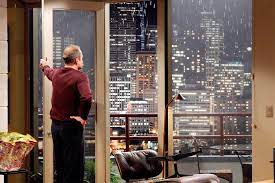

In [179]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)



In [180]:
df = pd.read_csv('data/eda.csv')
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,,0.0,3,7,...,0.0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.0,0.0,3,7,...,19910.0,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.0,0.0,3,6,...,,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.0,0.0,5,7,...,0.0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.0,0.0,3,8,...,0.0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [181]:
df.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
21592,263000018,3.000,2.500,1530.000,1131.000,3.000,0.0,0.0,3,8,...,0.0,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000,263000018,21593
21593,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.0,0.0,3,8,...,0.0,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000,6600060120,21594
21594,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.0,0.0,3,7,...,0.0,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141,21595
21595,291310100,3.000,2.500,1600.000,2388.000,2.000,,0.0,3,8,...,0.0,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000,291310100,21596
21596,1523300157,2.000,0.750,1020.000,1076.000,2.000,0.0,0.0,3,7,...,0.0,98144,47.594,-122.299,1020.000,1357.000,2014-10-15,325000.000,1523300157,21597


In [182]:
df.columns

Index(['id         ', 'bedrooms ', 'bathrooms ', 'sqft_living ', 'sqft_lot  ',
       'floors ', 'waterfront ', 'view ', 'condition ', 'grade ',
       'sqft_above ', 'sqft_basement ', 'yr_built ', 'yr_renovated ',
       'zipcode ', 'lat     ', 'long       ', 'sqft_living15 ', 'sqft_lot15 ',
       'date       ', 'price     ', 'house_id   ', 'id'],
      dtype='object')

Explanation of individual variables for King County Data Set

|Columns name | Description |
|---- | ------------- |
|id|unique identified for a house|
|date | house was sold|
|price| is prediction target|
|bedroomsNumber| # of bedrooms|
|bathroomsNumber| # of bathrooms|
|sqft_livingsquare|footage of the home|
|sqft_lotsquare|footage of the lot|
|floorsTotal|floors (levels) in house|
|waterfront| House which has a view to a waterfront|
|view| quality of view|
|condition| How good the condition is ( Overall )|
|grade| overall grade given to the housing unit, based on King County grading system|
|sqft_above|square footage of house apart from basement|
|sqft_basement|square footage of the basement|
|yr_built|Built Year|
|yr_renovated|Year when house was renovated|
|zipcode| zip|
|lat|Latitude coordinate|
|long|Longitude coordinate|
|sqft_living15|The square footage of interior housing living space for the nearest 15 neighbors|
|sqft_lot15|The square footage of the land lots of the nearest 15 neighbors|

In [183]:
df.shape

(21597, 23)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   bedrooms        21597 non-null  float64
 2   bathrooms       21597 non-null  float64
 3   sqft_living     21597 non-null  float64
 4   sqft_lot        21597 non-null  float64
 5   floors          21597 non-null  float64
 6   waterfront      21597 non-null  object 
 7   view            21597 non-null  object 
 8   condition       21597 non-null  int64  
 9   grade           21597 non-null  int64  
 10  sqft_above      21597 non-null  float64
 11  sqft_basement   21597 non-null  object 
 12  yr_built        21597 non-null  int64  
 13  yr_renovated    21597 non-null  object 
 14  zipcode         21597 non-null  int64  
 15  lat             21597 non-null  float64
 16  long            21597 non-null  float64
 17  sqft_living15   21597 non-null 

In [185]:
# drop redundant column

df2 = df.drop(df.columns[0], axis =1, inplace=False)
df2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,3.000,1.000,1180.000,5650.000,1.000,,0.0,3,7,1180.000,...,0.0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,3.000,2.250,2570.000,7242.000,2.000,0.0,0.0,3,7,2170.000,...,19910.0,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,2.000,1.000,770.000,10000.000,1.000,0.0,0.0,3,6,770.000,...,,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,4.000,3.000,1960.000,5000.000,1.000,0.0,0.0,5,7,1050.000,...,0.0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,3.000,2.000,1680.000,8080.000,1.000,0.0,0.0,3,8,1680.000,...,0.0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [186]:
#remove empty spaces in column names
df2.columns = df2.columns.str.replace(' ', '')
df2.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id'],
      dtype='object')

In [187]:
#rename columns 'lat' and 'long'
df2 =df2.rename({'lat':'lat_coordinate'}, axis=1)
df2 =df2.rename({'long':'long_coordinate'}, axis=1)
df2 =df2.rename({'id':'sale_id'}, axis=1)
df2.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat_coordinate', 'long_coordinate', 'sqft_living15', 'sqft_lot15',
       'date', 'price', 'house_id', 'sale_id'],
      dtype='object')

In [188]:
# Duplicates in house_id 

df2.house_id.duplicated().value_counts()

house_id
False    21420
True       177
Name: count, dtype: int64

In [189]:
# remove duplicates in new DataFrame --> do it later 
##df3 = df2.copy()
##df3.house_id.drop_duplicates()
##df3.head()

In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms         21597 non-null  float64
 1   bathrooms        21597 non-null  float64
 2   sqft_living      21597 non-null  float64
 3   sqft_lot         21597 non-null  float64
 4   floors           21597 non-null  float64
 5   waterfront       21597 non-null  object 
 6   view             21597 non-null  object 
 7   condition        21597 non-null  int64  
 8   grade            21597 non-null  int64  
 9   sqft_above       21597 non-null  float64
 10  sqft_basement    21597 non-null  object 
 11  yr_built         21597 non-null  int64  
 12  yr_renovated     21597 non-null  object 
 13  zipcode          21597 non-null  int64  
 14  lat_coordinate   21597 non-null  float64
 15  long_coordinate  21597 non-null  float64
 16  sqft_living15    21597 non-null  float64
 17  sqft_lot15  

In [191]:
# transform data types, sqft_basement to float64, yr_renovated date, yr_built date, date to date 

# yr_renovated columns converted to string 
#df2['yr_renovated'] = df2['yr_renovated'].astype(str)
#extract first 4 character as year
#df2['yr_renovated'] = df2['yr_renovated'].str.extract(r'(\d{4})')
#replace empty strings with zeros
#df2['yr_renovated'].replace('', '0', inplace=True)
# convert year to datetime
#df2['yr_renovated'] = pd.to_datetime(df2['yr_renovated'], format='%Y', errors='coerce')
#df2.head()

In [192]:
# sqft to float 64
# Remove leading and trailing whitespace
df2['sqft_basement'] = df2['sqft_basement'].str.strip()

# Replace empty strings with NaN
df2['sqft_basement'].replace('', np.nan, inplace=True)

# Convert the 'sqft_basement' column to float
df2['sqft_basement'] = df2['sqft_basement'].astype(float)

df2.head()

df2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat_coordinate,long_coordinate,sqft_living15,sqft_lot15,date,price,house_id,sale_id
0,3.000,1.000,1180.000,5650.000,1.000,,0.0,3,7,1180.000,...,0.0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,3.000,2.250,2570.000,7242.000,2.000,0.0,0.0,3,7,2170.000,...,19910.0,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,2.000,1.000,770.000,10000.000,1.000,0.0,0.0,3,6,770.000,...,,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,4.000,3.000,1960.000,5000.000,1.000,0.0,0.0,5,7,1050.000,...,0.0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,3.000,2.000,1680.000,8080.000,1.000,0.0,0.0,3,8,1680.000,...,0.0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [193]:
# transform yr_built to date

df2['yr_built'] = df2['yr_built'].astype(str).str[:4]
df2['yr_built'] = pd.to_datetime(df2['yr_built'], format='%Y', errors='coerce')
df2.yr_built.head()


0   1955-01-01
1   1951-01-01
2   1933-01-01
3   1965-01-01
4   1987-01-01
Name: yr_built, dtype: datetime64[ns]

In [194]:
#transform date to Datetime format
# Remove rows with empty strings or whitespace in 'date' column
#df2 = df2[df2['date'].str.strip() != '']

# Convert 'date' column to datetime format
#df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')
df2['date'] = pd.to_datetime(df2['date'], format='mixed')

df2['date'].head()


0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [195]:
df2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat_coordinate,long_coordinate,sqft_living15,sqft_lot15,date,price,house_id,sale_id
0,3.000,1.000,1180.000,5650.000,1.000,,0.0,3,7,1180.000,...,0.0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,3.000,2.250,2570.000,7242.000,2.000,0.0,0.0,3,7,2170.000,...,19910.0,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,2.000,1.000,770.000,10000.000,1.000,0.0,0.0,3,6,770.000,...,,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,4.000,3.000,1960.000,5000.000,1.000,0.0,0.0,5,7,1050.000,...,0.0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,3.000,2.000,1680.000,8080.000,1.000,0.0,0.0,3,8,1680.000,...,0.0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [196]:
df2.condition.unique()

array([3, 5, 4, 1, 2])

In [197]:
df2.isna().sum()

bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement      452
yr_built             0
yr_renovated         0
zipcode              0
lat_coordinate       0
long_coordinate      0
sqft_living15        0
sqft_lot15           0
date                 0
price                0
house_id             0
sale_id              0
dtype: int64

In [198]:
df2.price.describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [199]:
# price development over year

price_dev = df2.groupby('house_id')
price_dev.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat_coordinate,long_coordinate,sqft_living15,sqft_lot15,date,price,house_id,sale_id
0,3.000,1.000,1180.000,5650.000,1.000,,0.0,3,7,1180.000,...,0.0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,3.000,2.250,2570.000,7242.000,2.000,0.0,0.0,3,7,2170.000,...,19910.0,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,2.000,1.000,770.000,10000.000,1.000,0.0,0.0,3,6,770.000,...,,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,4.000,3.000,1960.000,5000.000,1.000,0.0,0.0,5,7,1050.000,...,0.0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,3.000,2.000,1680.000,8080.000,1.000,0.0,0.0,3,8,1680.000,...,0.0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3.000,2.500,1530.000,1131.000,3.000,0.0,0.0,3,8,1530.000,...,0.0,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000,263000018,21593
21593,4.000,2.500,2310.000,5813.000,2.000,0.0,0.0,3,8,2310.000,...,0.0,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000,6600060120,21594
21594,2.000,0.750,1020.000,1350.000,2.000,0.0,0.0,3,7,1020.000,...,0.0,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141,21595
21595,3.000,2.500,1600.000,2388.000,2.000,,0.0,3,8,1600.000,...,0.0,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000,291310100,21596


In [200]:
houses_under_640K = df2.query ('price <= 645000')
houses_under_640K.tail()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat_coordinate,long_coordinate,sqft_living15,sqft_lot15,date,price,house_id,sale_id
21592,3.000,2.500,1530.000,1131.000,3.000,0.0,0.0,3,8,1530.000,...,0.0,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000,263000018,21593
21593,4.000,2.500,2310.000,5813.000,2.000,0.0,0.0,3,8,2310.000,...,0.0,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000,6600060120,21594
21594,2.000,0.750,1020.000,1350.000,2.000,0.0,0.0,3,7,1020.000,...,0.0,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141,21595
21595,3.000,2.500,1600.000,2388.000,2.000,,0.0,3,8,1600.000,...,0.0,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000,291310100,21596
21596,2.000,0.750,1020.000,1076.000,2.000,0.0,0.0,3,7,1020.000,...,0.0,98144,47.594,-122.299,1020.000,1357.000,2014-10-15,325000.000,1523300157,21597


In [201]:
df2.price.describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [202]:
df2.sqft_living.describe()

count   21597.000
mean     2080.322
std       918.106
min       370.000
25%      1430.000
50%      1910.000
75%      2550.000
max     13540.000
Name: sqft_living, dtype: float64

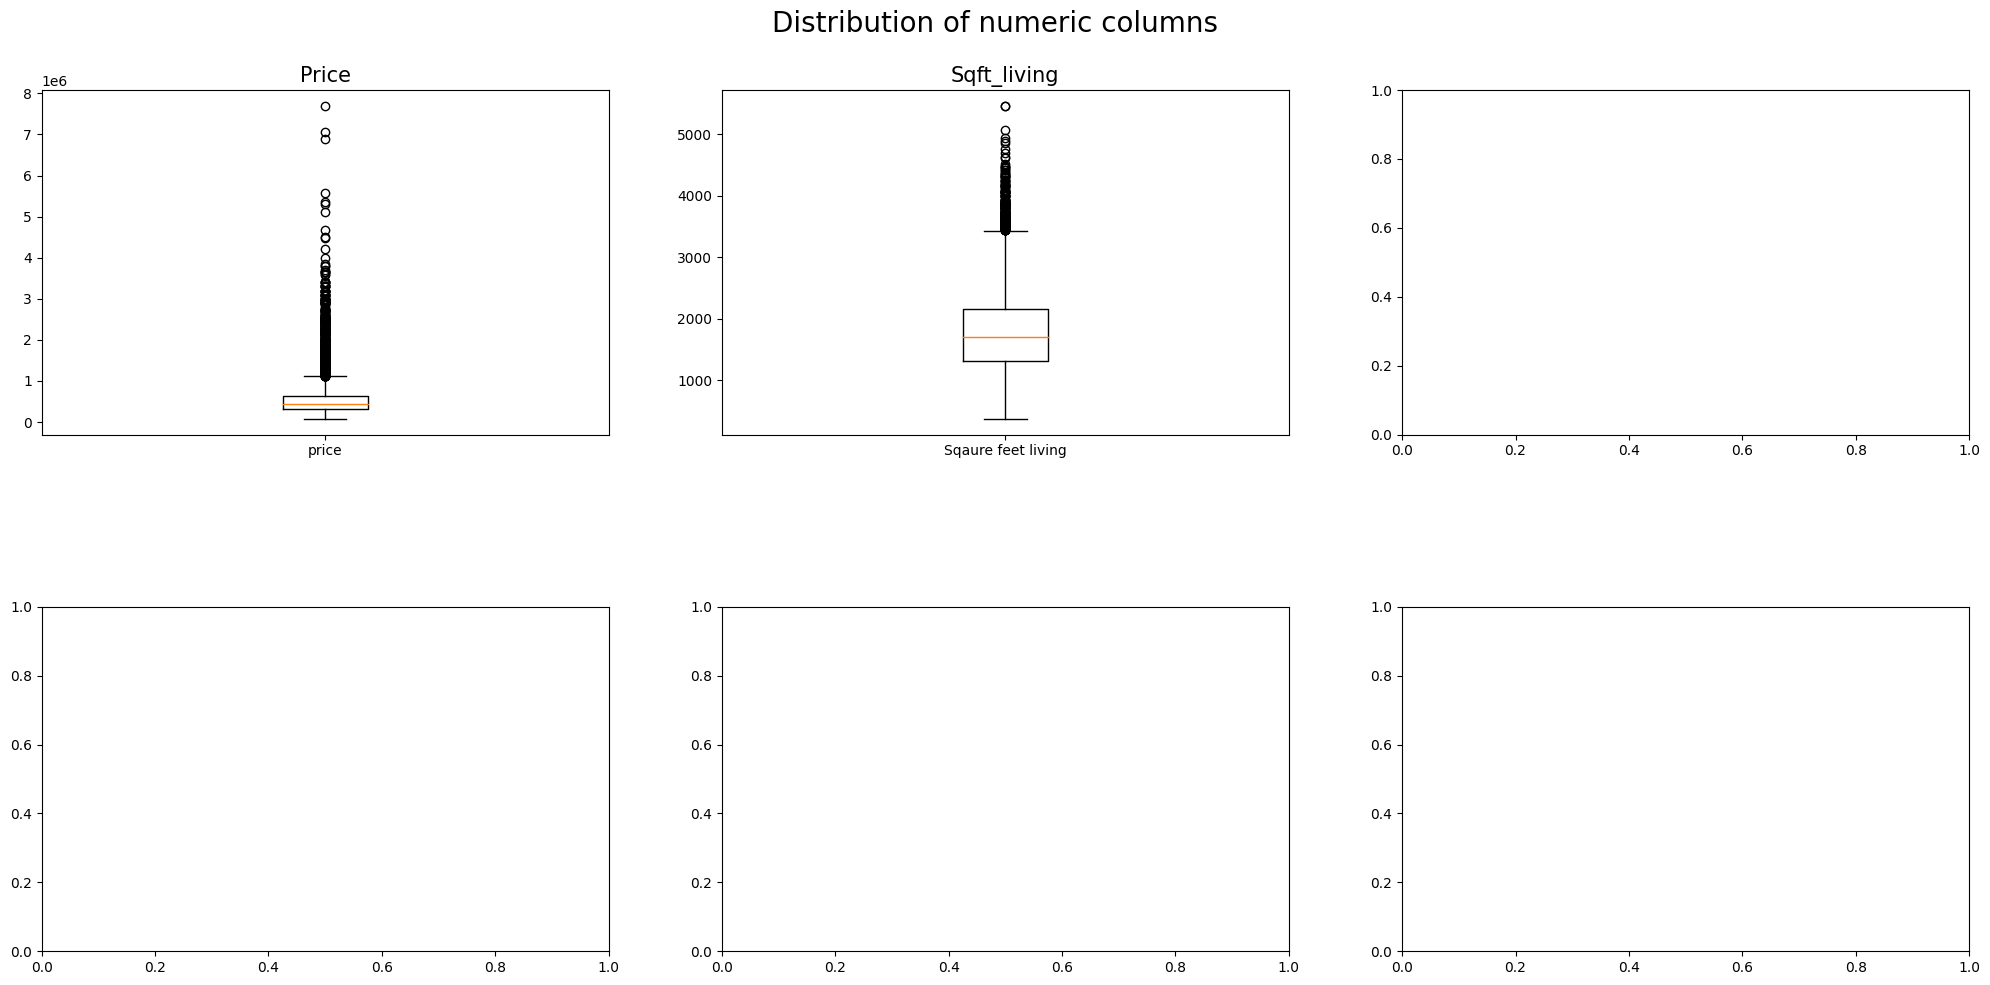

In [203]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots


ax[0][0].boxplot(x = df2['price']) # creates boxplot for number of views
ax[0][0].set_xticklabels(labels=["price"]) # sets the label for the ticks on the x-axis
#ax[0][0].set_ylim(0,1000000) # limits the y-axis values from 0 to 2000000 
ax[0][0].set_title("Price", fontsize = 15); # sets title for subplot


ax[0][1].boxplot(x = houses_under_640K['sqft_living'])
ax[0][1].set_xticklabels(labels=["Sqaure feet living"])
#ax[0][1].set_ylim(0,50000)
ax[0][1].set_title("Sqft_living", fontsize = 15);


In [204]:
df2.zipcode.nunique()

70

***Hypotheses***

| Question | Hyothesis |
| ---------|-----------|
| Does timing affect the price ?| House prices fluctuate over the year and are the lowest in season with low number of solds|
|Which lively and central area is still affordable for a budget in middle price range?| Lively and central areas with lower house conditions/grading are more affordable|
|Which standards can be expected from a middle-priced house in a lively and central area?| affordable houses will be small/non-renovated/no basement|

***What is needed from dataset***


* define budget for middle price class --> take interquartile of prices?
* define which area is lively and central (select zipcodes of central areas, select areas with high density) sqft_lot15 The square footage of the land lots of the nearest 15 neighbors small means that density is high
* Select only houses that are in the price range --> show areas that are affordable 
* show price by condition and grading (grouped by zipcode of central/lively area)
* groupby zipcode, plot house prices by date (linear plot --> x dates) --> get an overview if prices fluctuate
* group dates by month and plot prices --> to recommand in which month/season it is better to buy
* show plots of price by square_living, basement, number of bedrooms e.g.

***Price distribution***

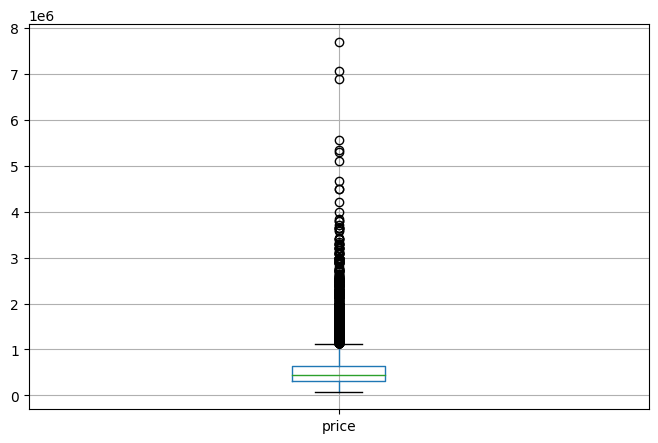

In [205]:
df2.boxplot(column = 'price')
plt.show()

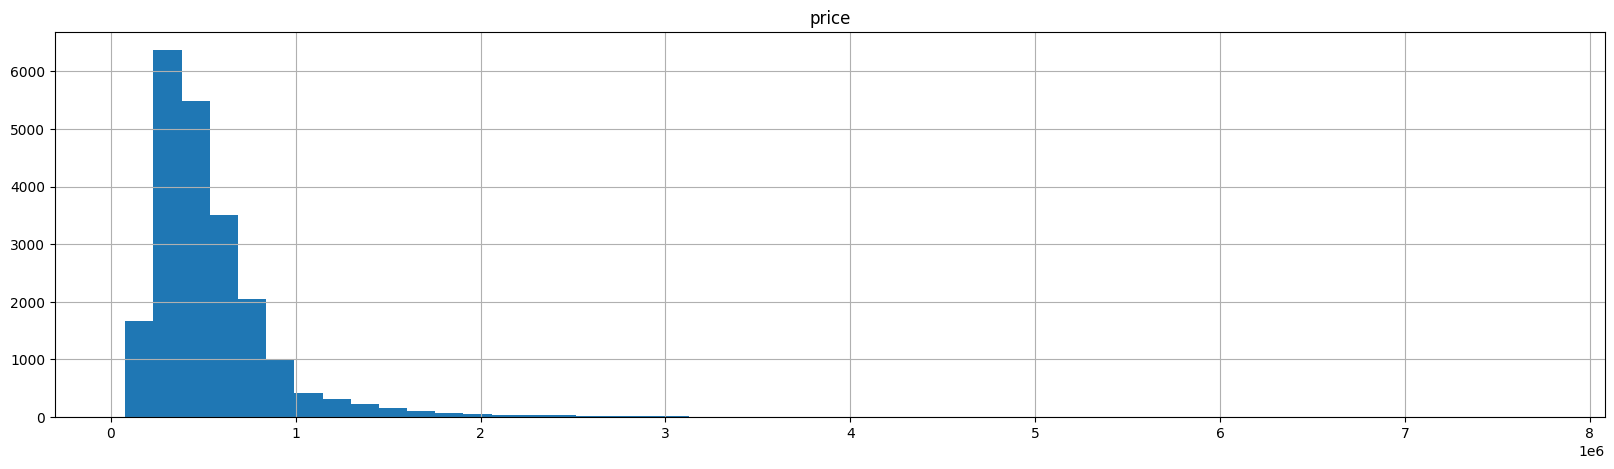

In [206]:
df2.hist(column = 'price', bins = 50, figsize = (20, 5))
plt.show()


Many outliers, price range is huge. Distribution of house prices is positively skewed

***Overview of all features that correlate with the price***

***Geomap***
Source: https://github.com/jerrychens/king_county_house_price/blob/master/Final_Jerry.ipynb

In [212]:


# create a base map of King County and surrounding 
basemap = folium.Map(location=[df2['lat_coordinate'].mean(),df2['long_coordinate'].mean()], zoom_start = 10)

# add heatmap to show housing density
coordinate_copy = df2[['lat_coordinate','long_coordinate']].copy()
coordinate_copy['count'] = 1
HeatMap(data = coordinate_copy.groupby(['lat_coordinate','long_coordinate']).sum().reset_index().values.tolist()
                       , radius=8, max_zoom=13, name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed = False).add_to(basemap) # turn off the heatmap toggle
basemap # render the map

inspiration here for zipcodes? https://www.kaggle.com/code/saidakbarp/nyc-property-sales-eda-map-analysis/notebook